# Data import and visualization using Python
The first part of this mini-course will focus on using the Python ecosystem to import and visualize data. We will focus on a few publically-available datasets (more are given in the syllabus) in various formats (CSV, DAT, XML, etc.) and with various data types (continuous, integer, datetime, character, etc.).

Suggested datasets (some will be used as examples):
- Princeton stats course by German Rodriguez *(small)*
- Social Security Baby Names *(small)*
- USDA food database *(medium)*
- 2010 US Census *(small; the API can give much larger datasets)*
- NY MTA *(small)*
- 2012 Federal Election Commission *(large)*
- MovieLens *(medium to large)*

The goal is to get everyone familiar with the nuances and potential issues involved in importing, cleaning, shaping and analyzing data. These datasets are typically used in several data projects or as analytic examples for various statistical tests. We also encourage (implore really) you for the assignments/homeworks to expand what you have learned in order to maniuplate data in both Python and R.  

Python modules for importing, visualizing and analyzing datasets:
- `pandas`
- `lxml`
- `json`
- `simplejson` (gives more informative error messages than json; good for troubleshooting)
- `Matplotlib`
- `Seaborn`
- `NumPy`
- `SciPy`
- `Statsmodels`
- `scikit-learn`

## Importing data using pandas
The majority of data you will be using will be in a tabular format, either from a deimited file, URL, database query, or some other method. Ideally, the file will have been formatted in a sensible manner (consistent delimiters and spacing) but that is not guaranteed. The `pandas` module will read in data in a tabular format and store it in a structure called a `DataFrame`; `DataFrame`s have several useful features that will be explored as we go through the data.  

The main functions you will likely use:
- `read_csv`: comma is the default delimiter
- `read_table`: more general function; `\t` is the default delimiter
- `read_fwf`: read fixed-width files  

See also the `pandas` IO Tools documentation: http://pandas.pydata.org/pandas-docs/stable/io.html

## Example 1: 2010 US Census data (CSV)
The first example we will look at is from the 2010 US Census, specifically the population density data. You can either download it to a local drive or access the URL directly.

In [1]:
import pandas as pd

In [2]:
density_url = 'http://www.census.gov/2010census/csv/pop_density.csv'

density_data_2010 = pd.read_csv(density_url)

density_data_2010.head()

,# POPULATION DENSITY DATA PROVIDED BY U.S. CENSUS.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,# DENSITY EXPRESSED AS PEOPLE PER SQUARE MILE.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,# DENSITY RANKING EXPRESSED IN ORDER OF MOST D...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
3,United States,92228531,106021568,123202660,132165129,151325798,179323175,203211926,226545805,248709873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,25,24,23,24,28,28,28,27,28,29


So what happened here? We (1) specified the URL as a string; (2) called the `read_csv` function to download the data and assign it to the variable `density_data_2010`; (3) examined the first six rows using the `head` function.  

Do we really want the data in this format? We likely want the row with the index of **`2`** to be the header of our `DataFrame`. Let's reimport the data, using some of `read_csv`'s additional arguments.

In [3]:
density_url = 'http://www.census.gov/2010census/csv/pop_density.csv'

density_data_2010 = pd.read_csv(density_url, skiprows = [0, 1, 2])

density_data_2010.head()

,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
0,United States,92228531,106021568,123202660,132165129,151325798,179323175,203211926,226545805,248709873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,25,24,23,24,28,28,28,27,28,29
2,Alaska,64356,55036,59278,72524,128643,226167,300382,401851,550043,...,52,52,52,52,52,52,52,52,52,52
3,Arizona,204354,334162,435573,499261,749587,1302161,1770900,2718215,3665228,...,49,47,47,47,43,43,42,39,38,35
4,Arkansas,1574449,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,...,31,32,32,34,36,37,37,37,36,36


That is much better. Let's now explore some of the basic functionality of a `pandas` DataFrame that will aid productivity and inform about the structure of the data.

In [4]:
density_data_dimen = density_data_2010.shape
density_data_cols = density_data_2010.columns.values.tolist()
density_data_idx = density_data_2010.index
pop_1910 = density_data_2010['1910_POPULATION'].values

print 'Data dimensions: %d rows, %d columns' % (density_data_dimen[0], density_data_dimen[1])
print 'First 10 indices of population density DataFrame: ', density_data_idx[:10]

print 'Names of DataFrame columns:'
print 'Name: index'
for position, name in enumerate(density_data_cols):
    print name, ':', position

Data dimensions: 53 rows, 34 columns
First 10 indices of population density DataFrame:  Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')
Names of DataFrame columns:
Name: index
STATE_OR_REGION : 0
1910_POPULATION : 1
1920_POPULATION : 2
1930_POPULATION : 3
1940_POPULATION : 4
1950_POPULATION : 5
1960_POPULATION : 6
1970_POPULATION : 7
1980_POPULATION : 8
1990_POPULATION : 9
2000_POPULATION : 10
2010_POPULATION : 11
1910_DENSITY : 12
1920_DENSITY : 13
1930_DENSITY : 14
1940_DENSITY : 15
1950_DENSITY : 16
1960_DENSITY : 17
1970_DENSITY : 18
1980_DENSITY : 19
1990_DENSITY : 20
2000_DENSITY : 21
2010_DENSITY : 22
1910_RANK : 23
1920_RANK : 24
1930_RANK : 25
1940_RANK : 26
1950_RANK : 27
1960_RANK : 28
1970_RANK : 29
1980_RANK : 30
1990_RANK : 31
2000_RANK : 32
2010_RANK : 33


In [5]:
print 'Population values in 1910 (first 10 entries):'
pop_1910[:10]

Population values in 1910 (first 10 entries):


array([92228531,  2138093,    64356,   204354,  1574449,  2377549,
         799024,  1114756,   202322,   331069])

So the output of the preceding cells was:
- the shape of the data using the `shape` function
- converting the names of the columns to a list and then printing the names and their positions
- retrieving the values of the indices, in this case row numbers
- retreiving the first 10 values of the population for the year 1910  

We will come back to this dataset later in order to do more with indexing.

## Example 2: Program effort data (DAT)
The next dataset we will look at is the program effort dataset by Mauldin and Berelson, which can be downloaded from German Rodriguez's site. We will specficially look at the `DAT` version of the data, since it presents several challenges: we do not want to automatically make an index column from the first column in the file and the delimiters are not consistent.  

To import the data, we will dictate the column names (hence `header = 0`), set the source URL as a string, and state there is no index column in the dataset.

In [6]:
col_names = ['Country', 'Setting', 'Effort', 'Change']
effort_url = 'http://data.princeton.edu/wws509/datasets/effort.dat'
effort_data = pd.read_table(effort_url, index_col = False, header = 0, names = col_names)
effort_data.head()

CParserError: Too many columns specified: expected 4 and found 1

Well, that was interesting. Seems we cannot read in the data with the tab delimiter. We have multiple spaces present in the file (`CParserError: Too many columns specified: expected 4 and found 1`), so let's use Python syntax for multiple/variable whitespace and see what happens.

In [7]:
effort_data = pd.read_table(effort_url, index_col = False, header = 0, names = col_names, sep = '\s+')
effort_data.head()

,Country,Setting,Effort,Change
0,Bolivia,46,0,1
1,Brazil,74,0,10
2,Chile,89,16,29
3,Colombia,77,16,25
4,CostaRica,84,21,29


##Excel
A lot of data will be in Excel format...please do not do this. While convenient and many programs can read it, Excel does a lot of weird things under the hood you may not be familiar with. Not to mention formatting issues and how certain values may have been calculated - formula references may not necessarily propagate. And there is the issue of dates - the origin of the calendar differs between platforms and this must be accounted for. If you have data originally in Excel format, I suggest (implore) you to just have the raw data and if you have any calculated columns, try doing those in another program (it will probably be more readily reporducible anyway). In other words take your raw data, export to a different file format (CSV, TSV, TXT) and then perform any data manipulations.  

As an example, let's parse a file Hadley Wickham uses as a part of the `readxl` R package (foreshadowing!).

In [8]:
example_xlsx = '/Users/julian/GitHub/reproducible-research/Day-2/datasets/datasets.xlsx'
iris_data = pd.read_excel(example_xlsx, 'iris', index_col = None)
mtcars_data = pd.read_excel(example_xlsx, 'mtcars', index_col = None)
chick_weight_data = pd.read_excel(example_xlsx, 'chickwts', index_col = None)
quake_data = pd.read_excel(example_xlsx, 'quakes', index_col = None)

In [9]:
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
mtcars_data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


In [11]:
chick_weight_data.head()

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean


In [12]:
quake_data.head()

,lat,long,depth,mag,stations
0,-20.42,181.62,562,4.8,41
1,-20.62,181.03,650,4.2,15
2,-26.00,184.10,42,5.4,43
3,-17.97,181.66,626,4.1,19
4,-20.42,181.96,649,4.0,11


## XML and JSON
XML and JSON files can be tricky to work with, as you will need to know their structure. The NY MTA makes data avaialable in both XML and CSV format; the CSV file is (obviously) easier to work with. If you are working with data from the web, it may be in XML format, where the hierarchical structure makes it ideal for representing nested relationships. Web data may also be in JSON format and may require you to (1) know the structure or (2) have it be arranged in a sensible manner for `pandas` or some other module to read (e.g., the USDA dataset). In any event, reading in data contained in XML or JSON format will be highly context-dependent.  

If you really need an example of one of these, we can work through it.

##DataFrame methods
There are several methods to access and summarize data for a `DataFrame`. We will cover the basics; if you are interested in more advanced features, such as hierarchical indexing, either check the documentation or ask. Also, Wes McKinney's book goes into much more detail about the features.  

Topics covered:
- creating a `DataFrame`
- indexing
- selecting and filtering data
- mapping values and functions
- missing data
- summaries and basic statistical descriptions
- plotting
- grouping data

These topics, some of which have been touched on indirectly in the previous examples, will all be tied together and be used for the today's ultimate assignment, analyzing data from the Federal Election Commission.

### Creating a `DataFrame` and indexing
There are several ways to create a `DataFrame`: 
1. 2-D data matrix  
2. Dict of array, list, or tuple  
3. Dict of  pandas Series  
4. Dict of dicts  
5. List of a dict or Series  
6. List of lists or tuples  
7. `DataFrame` itself
8. NumPy structured or record array
9. NumPy MaskedArray  

Let's go through some of these (since time is limited - you can try buildng the others on your own) and see what the resulting `DataFrame` for each example looks like.

In [13]:
import numpy as np
np.random.seed(86519883)
test_array = np.random.normal(size = (10, 3))
test_cols = ['first', 'second', 'third']
test_df1 = pd.DataFrame(test_array, columns = test_cols)
test_df1

,first,second,third
0,1.506345,-1.258868,1.351401
1,-0.525163,-0.059811,-1.417249
2,1.017855,-1.414488,1.904819
3,-0.850640,0.585136,0.815462
4,-0.039259,-2.069984,-0.338659
5,-0.812900,-0.426300,0.116699
6,0.742014,-0.213540,-0.230428
7,-0.188394,0.572692,-0.223483
8,1.892520,1.381912,0.155761
9,-2.679491,0.396956,-0.544338


The above cell does the following: takes a 2-D array (using `NumPy`), a list containing the column names and then uses them as arguments to create a new `DataFrame` with the desired data and headings.

In [14]:
test_dict = {'int_column': np.random.random_integers(low = 0, high = 255, size = (5)),
            'binom_column': np.random.binomial(n = 1, p = 0.56, size = (5)),
            'char_col': ['sample1', 'sample2', 'sample3', 'sample4', 'sample5']}
test_df2 = pd.DataFrame(test_dict)
test_df2

,binom_column,char_col,int_column
0,0,sample1,1
1,1,sample2,13
2,1,sample3,218
3,1,sample4,120
4,0,sample5,97


The previous cell used a `dict` to create the `DataFrame`. The keys became the column headings, and the rows are the values. Notice that the columns are sorted in order when the `DataFrame` was created.

In [15]:
test_col1 = np.random.lognormal(mean = 2.7, sigma = 0.2, size = (30))
test_col2 = np.random.normal(loc = -1.6, scale = 2.8, size = (30))
test_col3 = np.random.uniform(low = 55, high = 2000, size = (30))
test_df3 = pd.DataFrame()

test_df3['one'] = test_col1
test_df3['2'] = test_col2
test_df3['third'] = test_col3
test_df3.head()

,one,2,third
0,21.360431,2.797549,1238.321714
1,12.885247,-1.191469,838.198814
2,13.010238,-0.757442,378.645223
3,11.763051,-3.579088,1447.523136
4,19.436387,1.562681,828.194497


And you can create a new `DataFrame` (or append to an existing one) from arrays and append new ones as well.

How do we access the data? We use the indices of the `DataFrame` (the leftmost column). The `Index` can either be numeric or text. Indexes are immutable, but they can be set or reset. We can also access the columns in the same way we would access the elements of a `list` or `dict` or via attribute.


In [16]:
test_df1['first']

0    1.506345
1   -0.525163
2    1.017855
3   -0.850640
4   -0.039259
5   -0.812900
6    0.742014
7   -0.188394
8    1.892520
9   -2.679491
Name: first, dtype: float64

In [17]:
test_df2.char_col

0    sample1
1    sample2
2    sample3
3    sample4
4    sample5
Name: char_col, dtype: object

In [18]:
test_df3.ix[:15, :]

,one,2,third
0,21.360431,2.797549,1238.321714
1,12.885247,-1.191469,838.198814
2,13.010238,-0.757442,378.645223
3,11.763051,-3.579088,1447.523136
4,19.436387,1.562681,828.194497
5,17.368588,1.112077,1524.428166
6,13.969669,-0.147352,1456.760166
7,16.614492,-1.820801,1641.645769
8,10.633133,2.721424,1013.522202
9,17.134575,-0.693699,1485.303040


In [19]:
test_df3.ix[11, ['one', '2']]

one    19.946381
2      -5.676580
Name: 11, dtype: float64

Let's say we do not want integers as our indices, but instead characters. Using the Census data, let's make the state or region the index values.

In [20]:
density_data_2010.set_index(density_data_2010.STATE_OR_REGION, inplace = True, drop = True)
density_data_2010.head()

,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
STATE_OR_REGION,,,,,,,,,,,,,,,,,,,,,
United States,United States,92228531,106021568,123202660,132165129,151325798,179323175,203211926,226545805,248709873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alabama,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,25,24,23,24,28,28,28,27,28,29
Alaska,Alaska,64356,55036,59278,72524,128643,226167,300382,401851,550043,...,52,52,52,52,52,52,52,52,52,52
Arizona,Arizona,204354,334162,435573,499261,749587,1302161,1770900,2718215,3665228,...,49,47,47,47,43,43,42,39,38,35
Arkansas,Arkansas,1574449,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,...,31,32,32,34,36,37,37,37,36,36


Now instead of iterating over integers, we can iterate over the characters.

In [21]:
pop_dict = {}
for state in density_data_2010.STATE_OR_REGION:
    pop_dict[state] = density_data_2010.loc[state, '2010_POPULATION']

for k in pop_dict:
    print k, pop_dict[k]

Mississippi 2967297
Oklahoma 3751351
Delaware 897934
Minnesota 5303925
Illinois 12830632
Arkansas 2915918
New Mexico 2059179
Indiana 6483802
Maryland 5773552
Louisiana 4533372
Idaho 1567582
Wyoming 563626
Tennessee 6346105
Arizona 6392017
Iowa 3046355
Michigan 9883640
Kansas 2853118
Utah 2763885
Virginia 8001024
Oregon 3831074
Connecticut 3574097
Montana 989415
California 37253956
Massachusetts 6547629
West Virginia 1852994
South Carolina 4625364
New Hampshire 1316470
Wisconsin 5686986
Vermont 625741
Georgia 9687653
North Dakota 672591
Pennsylvania 12702379
Puerto Rico 3725789
Florida 18801310
Alaska 710231
Kentucky 4339367
Hawaii 1360301
United States 308745538
Nebraska 1826341
Missouri 5988927
Ohio 11536504
Alabama 4779736
New York 19378102
South Dakota 814180
Colorado 5029196
New Jersey 8791894
Washington 6724540
North Carolina 9535483
District of Columbia 601723
Texas 25145561
Nevada 2700551
Maine 1328361
Rhode Island 1052567


In [22]:
for state in density_data_2010.STATE_OR_REGION:
    print state, density_data_2010.loc[state, '1930_POPULATION']

United States 123202660
Alabama 2646248
Alaska 59278
Arizona 435573
Arkansas 1854482
California 5677251
Colorado 1035791
Connecticut 1606903
Delaware 238380
District of Columbia 486869
Florida 1468211
Georgia 2908506
Hawaii 368336
Idaho 445032
Illinois 7630654
Indiana 3238503
Iowa 2470939
Kansas 1880999
Kentucky 2614589
Louisiana 2101593
Maine 797423
Maryland 1631526
Massachusetts 4249614
Michigan 4842325
Minnesota 2563953
Mississippi 2009821
Missouri 3629367
Montana 537606
Nebraska 1377963
Nevada 91058
New Hampshire 465293
New Jersey 4041334
New Mexico 423317
New York 12588066
North Carolina 3170276
North Dakota 680845
Ohio 6646697
Oklahoma 2396040
Oregon 953786
Pennsylvania 9631350
Rhode Island 687497
South Carolina 1738765
South Dakota 692849
Tennessee 2616556
Texas 5824715
Utah 507847
Vermont 359611
Virginia 2421851
Washington 1563396
West Virginia 1729205
Wisconsin 2939006
Wyoming 225565
Puerto Rico 1543913


We can also drop data easily:

In [23]:
density_data_2010 = density_data_2010.drop('United States', axis = 0)

In [24]:
density_data_2010.head()

,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
STATE_OR_REGION,,,,,,,,,,,,,,,,,,,,,
Alabama,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,25,24,23,24,28,28,28,27,28,29
Alaska,Alaska,64356,55036,59278,72524,128643,226167,300382,401851,550043,...,52,52,52,52,52,52,52,52,52,52
Arizona,Arizona,204354,334162,435573,499261,749587,1302161,1770900,2718215,3665228,...,49,47,47,47,43,43,42,39,38,35
Arkansas,Arkansas,1574449,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,...,31,32,32,34,36,37,37,37,36,36
California,California,2377549,3426861,5677251,6907387,10586223,15717204,19953134,23667902,29760021,...,35,31,30,22,15,15,16,14,14,13


In [25]:
test_df3 = test_df3.drop('one', axis = 1)

In [26]:
test_df3.head()

,2,third
0,2.797549,1238.321714
1,-1.191469,838.198814
2,-0.757442,378.645223
3,-3.579088,1447.523136
4,1.562681,828.194497


In [27]:
test_df2 = test_df2.drop([2, 4])

In [28]:
test_df2.head()

,binom_column,char_col,int_column
0,0,sample1,1
1,1,sample2,13
3,1,sample4,120


### Mapping values and functions
You will likely have to create numeric, character, or composite labels for your data at some point. Mapping values is easy using the `map` function. Going back to the Census data, we will map the state or region name to its two-letter abbreviation and its geographic region. We will use several `dicts` to accomplish this.

In [29]:
state_abbrevs = {'Connecticut':'CT' , 'Maine':'ME', 'Massachusetts':'MA',
                   'New Hampshire':'NH', 'Rhode Island':'RI' , 'Vermont':'VT',
                  'New Jersey':'NJ' , 'New York':'NY' , 'Pennsylvania':'PA',
                  'Illinois':'IL', 'Indiana':'IN', 'Michigan':'MI', 'Ohio':'OH',
                  'Wisconsin':'WI', 'Iowa':'IA', 'Kansas':'KS', 'Minnesota':'MN',
                  'Nebraska':'NE', 'North Dakota':'ND', 'South Dakota':'SD', 'Missouri':'MO',
                  'Delaware':'DE', 'Florida':'FL', 'Georgia':'GA', 'Maryland':'MD', 
                  'North Carolina':'NC', 'South Carolina':'SC','Virginia':'VA',
                  'West Virginia':'WV', 'Alabama':'AL','Kentucky':'KY', 'Mississippi':'MS', 
                  'Tennessee':'TN', 'Arkansas':'AR', 'Louisiana':'LA', 'Oklahoma':'OK', 
                  'Texas':'TX', 'Arizona':'AZ', 'Colorado':'CO', 'Idaho':'ID', 'Montana':'MT', 
                  'Nevada':'NV','New Mexico':'NM', 'Utah':'UT', 'Wyoming':'WY', 'Alaska':'AK',
                  'California':'CA', 'Hawaii':'HI', 'Oregon':'OR', 'Washington':'WA'}
                  

census_regions = {'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast',
                  'NH': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast',
                  'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',
                  'IL':'Midwest', 'IN':'Midwest', 'MI':'Midwest', 'OH':'Midwest',
                  'WI':'Midwest', 'IA':'Midwest', 'KS':'Midwest', 'MN':'Midwest',
                  'NE':'Midwest', 'ND':'Midwest', 'SD':'Midwest', 'MO':'Midwest',
                  'DE':'South', 'FL':'South', 'GA':'South', 'MD':'South', 
                  'NC':'South', 'SC':'South', 'VA':'South', 'DC':'South',
                  'WV':'South', 'AL':'South', 'KY':'South', 'MS':'South', 
                  'TN':'South', 'AR':'South', 'LA':'South', 'OK':'South', 
                  'TX':'South','AZ':'West', 'CO':'West', 'ID':'West', 'MT':'West',
                  'NV':'West', 'NM':'West', 'UT':'West', 'WY':'West', 'AK':'West',
                  'CA':'West','HI':'West', 'OR':'West', 'WA':'West'}

In [30]:
density_data_2010['Abbrev'] = density_data_2010.STATE_OR_REGION.map(state_abbrevs)
density_data_2010['Region'] = density_data_2010.Abbrev.map(census_regions)
density_data_2010.head()

,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK,Abbrev,Region
STATE_OR_REGION,,,,,,,,,,,,,,,,,,,,,
Alabama,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,23,24,28,28,28,27,28,29,AL,South
Alaska,Alaska,64356,55036,59278,72524,128643,226167,300382,401851,550043,...,52,52,52,52,52,52,52,52,AK,West
Arizona,Arizona,204354,334162,435573,499261,749587,1302161,1770900,2718215,3665228,...,47,47,43,43,42,39,38,35,AZ,West
Arkansas,Arkansas,1574449,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,...,32,34,36,37,37,37,36,36,AR,South
California,California,2377549,3426861,5677251,6907387,10586223,15717204,19953134,23667902,29760021,...,30,22,15,15,16,14,14,13,CA,West


The next thing we want to do is collect summaries, such as the total population in each year (which we deleted earlier), the mean and median state population in each year, and the mean and median population for each state across each census. Fortunately for us, we can apply functions directly to our `DataFrame` to get the desired values.

In [31]:
pop_cols = ['1910_POPULATION', '1920_POPULATION', '1930_POPULATION', '1940_POPULATION', '1950_POPULATION',
           '1960_POPULATION', '1970_POPULATION', '1980_POPULATION', '1990_POPULATION', '2000_POPULATION',
           '2010_POPULATION']

density_data_2010['MeanPop'] = density_data_2010[pop_cols].mean(axis = 1)
density_data_2010['MedianPop'] = density_data_2010[pop_cols].median(axis = 1)
density_data_2010.head()

,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK,Abbrev,Region,MeanPop,MedianPop
STATE_OR_REGION,,,,,,,,,,,,,,,,,,,,,
Alabama,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,28,28,28,27,28,29,AL,South,3354494.090909,3266740
Alaska,Alaska,64356,55036,59278,72524,128643,226167,300382,401851,550043,...,52,52,52,52,52,52,AK,West,290494.818182,226167
Arizona,Arizona,204354,334162,435573,499261,749587,1302161,1770900,2718215,3665228,...,43,43,42,39,38,35,AZ,West,2109280.909091,1302161
Arkansas,Arkansas,1574449,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,...,36,37,37,37,36,36,AR,South,2088734.363636,1923295
California,California,2377549,3426861,5677251,6907387,10586223,15717204,19953134,23667902,29760021,...,15,15,16,14,14,13,CA,West,17199921.454545,15717204


In [32]:
year_totals = density_data_2010[pop_cols].sum(axis = 0)
year_totals

1910_POPULATION     93346543
1920_POPULATION    107321377
1930_POPULATION    124746573
1940_POPULATION    134034384
1950_POPULATION    153536501
1960_POPULATION    181672719
1970_POPULATION    205923959
1980_POPULATION    229742325
1990_POPULATION    252231910
2000_POPULATION    285230516
2010_POPULATION    312471327
dtype: int64

Notice something interesting here: the columns become the indices for another `pandas` data type, a `Series`.

In [33]:
type(year_totals)

pandas.core.series.Series

In [34]:
year_totals.index.values.tolist()

['1910_POPULATION',
 '1920_POPULATION',
 '1930_POPULATION',
 '1940_POPULATION',
 '1950_POPULATION',
 '1960_POPULATION',
 '1970_POPULATION',
 '1980_POPULATION',
 '1990_POPULATION',
 '2000_POPULATION',
 '2010_POPULATION']

We can convert this to something perhaps more useful, such as a `NumPy` array:

In [35]:
year_totals_np = np.array(year_totals)
type(year_totals_np)

numpy.ndarray

In [36]:
year_totals_np

array([ 93346543, 107321377, 124746573, 134034384, 153536501, 181672719,
       205923959, 229742325, 252231910, 285230516, 312471327])

###Missing data
Astute observers will notice that I kind of misled you on the mapping of regions and mean and median populations: Puerto Rico and the District of Columbia were not included for the mapping of regions, but were for the population stats. How do we know which entries are missing? `pandas` has methods to do that.  

- `dropna`: drop missing data for a given axis label; can adjust how many entries are null are tolerated  
- `fillna`: fill in missing values with a given value  
- `isnull`: return Boolean (`True` or `False`) indicating which values are missing  
- `notnull`: negates `isnull`  

Since real data will likely contain missing values, these methods are very useful. You may desire to fill in missing values with the series mean or median, but for statistical analysis, this is generally frowned upon. And by frowned upon, I mean you will be told to re-analyze your data by a reviewer.

In [37]:
density_data_2010.MeanPop.isnull()

STATE_OR_REGION
Alabama                 False
Alaska                  False
Arizona                 False
Arkansas                False
California              False
Colorado                False
Connecticut             False
Delaware                False
District of Columbia    False
Florida                 False
Georgia                 False
Hawaii                  False
Idaho                   False
Illinois                False
Indiana                 False
Iowa                    False
Kansas                  False
Kentucky                False
Louisiana               False
Maine                   False
Maryland                False
Massachusetts           False
Michigan                False
Minnesota               False
Mississippi             False
Missouri                False
Montana                 False
Nebraska                False
Nevada                  False
New Hampshire           False
New Jersey              False
New Mexico              False
New York                

In [38]:
density_data_2010.Abbrev.notnull()

STATE_OR_REGION
Alabama                  True
Alaska                   True
Arizona                  True
Arkansas                 True
California               True
Colorado                 True
Connecticut              True
Delaware                 True
District of Columbia    False
Florida                  True
Georgia                  True
Hawaii                   True
Idaho                    True
Illinois                 True
Indiana                  True
Iowa                     True
Kansas                   True
Kentucky                 True
Louisiana                True
Maine                    True
Maryland                 True
Massachusetts            True
Michigan                 True
Minnesota                True
Mississippi              True
Missouri                 True
Montana                  True
Nebraska                 True
Nevada                   True
New Hampshire            True
New Jersey               True
New Mexico               True
New York                

In [39]:
density_data_2010.Region.isnull()

STATE_OR_REGION
Alabama                 False
Alaska                  False
Arizona                 False
Arkansas                False
California              False
Colorado                False
Connecticut             False
Delaware                False
District of Columbia     True
Florida                 False
Georgia                 False
Hawaii                  False
Idaho                   False
Illinois                False
Indiana                 False
Iowa                    False
Kansas                  False
Kentucky                False
Louisiana               False
Maine                   False
Maryland                False
Massachusetts           False
Michigan                False
Minnesota               False
Mississippi             False
Missouri                False
Montana                 False
Nebraska                False
Nevada                  False
New Hampshire           False
New Jersey              False
New Mexico              False
New York                

Let's say we want to drop all rows with missing values:

In [40]:
print 'Dimensions of population DataFrame: %d rows, %d columns' % \
  (density_data_2010.shape[0], density_data_2010.shape[1])

Dimensions of population DataFrame: 52 rows, 38 columns


In [41]:
density_data_2010_na_removed = density_data_2010.dropna()
print 'Dimensions of population DataFrame with NA removed: %d rows, %d columns' % \
(density_data_2010_na_removed.shape[0], density_data_2010_na_removed.shape[1])

Dimensions of population DataFrame with NA removed: 50 rows, 38 columns


###Describing and summarizing data
So now we are familiar with some common operations of `DataFrame`s we will likely encounter. However, we want a general overview of the data itself, in addition to getting basic statistics (first four moments, quantiles, etc.). To get an overview of the `DataFrame` itself, let's first use the `describe` function.

In [42]:
density_data_2010.describe()

,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,2000_POPULATION,...,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK,MeanPop,MedianPop
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1795125.826923,2063872.634615,2398972.557692,2577584.307692,2952625.019231,3493706.134615,3960076.134615,4418121.634615,4850613.653846,5485202.230769,...,26.480769,26.500000,26.461538,26.480769,26.500000,26.500000,26.500000,26.500000,3636814.919580,3493913.634615
std,1812864.195613,2085462.625487,2488014.230212,2643620.717531,3044166.662290,3713286.399987,4275071.337146,4656066.801007,5388880.815353,6107897.124254,...,15.127550,15.154757,15.128808,15.152157,15.154757,15.154757,15.154757,15.154757,3705466.577450,3714298.527455
min,64356.000000,55036.000000,59278.000000,72524.000000,128643.000000,226167.000000,300382.000000,401851.000000,453588.000000,493782.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,290494.818182,226167.000000
25%,514600.500000,590520.000000,645035.250000,642704.500000,734405.750000,882842.250000,980717.250000,1084667.750000,1221404.250000,1606935.500000,...,13.750000,13.750000,13.750000,13.750000,13.750000,13.750000,13.750000,13.750000,958078.227273,882842.250000
50%,1405373.000000,1573712.500000,1733985.000000,1898609.000000,2194808.500000,2366069.000000,2651274.500000,3066433.000000,3390548.500000,3910311.000000,...,26.500000,26.500000,26.500000,26.500000,26.500000,26.500000,26.500000,26.500000,2557630.954545,2389317.000000
75%,2300893.750000,2577359.000000,2916131.000000,3127189.000000,3437075.750000,4055165.000000,4655495.750000,5375889.750000,5662225.500000,6147638.000000,...,39.250000,39.250000,39.250000,39.250000,39.250000,39.250000,39.250000,39.250000,4448351.840909,4055165.000000
max,9113614.000000,10385227.000000,12588066.000000,13479142.000000,14830192.000000,16782304.000000,19953134.000000,23667902.000000,29760021.000000,33871648.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,17199921.454545,16782304.000000


You will notice that for the columns with numeric data, it gives basic summary satistics: number of entries, mean, standard deviation, and the Tukey five-number summary (min, 1Q, median, 3Q, max; NOTE: this may be computed differently depending on the program). What about for non-numeric data?

In [43]:
density_data_2010[['Abbrev', 'Region']].describe()

,Abbrev,Region
count,50,50
unique,50,4
top,SD,South
freq,1,16


And other methods can be called:

In [44]:
print 'State with greatest population in 1980: ', density_data_2010['1980_POPULATION'].idxmax()
print 'State with smallest population in 1940: ', density_data_2010['1940_POPULATION'].idxmin()

State with greatest population in 1980:  California
State with smallest population in 1940:  Alaska


In [45]:
print 'Variance of the 1980 population: ', density_data_2010['1980_POPULATION'].var()

Variance of the 1980 population:  2.16789580554e+13


In [46]:
print 'Skew of the 1980 population: ', density_data_2010['1980_POPULATION'].skew()

Skew of the 1980 population:  2.1850588832


## Grouping and plotting data
Tables are all well and good, but insight and finding patterns really only becomes useful with visualization. We will cover the following types of plots:
- scatter plots  
- line plots  
- bar plots  
- histograms/density estimates  
  
In addition, you will likely have to group your data by some variable. We accomplish this using the `groupby` function/method.

### Basic scatter and line plots
For our first example, we will create a dataset, then plot the various relationships.

In [47]:
col1 = np.random.lognormal(mean = 4.5, sigma = 0.08, size = (200))
col2 = np.random.normal(loc = 2.3, scale = 0.57, size = (200))
col3 = np.random.uniform(low = 0, high = 2000, size = (200))
col4 = np.random.geometric(p = 0.34, size = (200))
col5 = np.linspace(1, 200, 200)
plot_df = pd.DataFrame()

plot_df['col1'] = col1
plot_df['col2'] = col2
plot_df['col3'] = col3
plot_df['col4'] = col4
plot_df['col5'] = col5
plot_df.head()

,col1,col2,col3,col4,col5
0,81.961986,2.601655,1516.396194,2,1
1,84.773654,2.257777,1000.824544,1,2
2,90.159253,3.020090,911.320312,10,3
3,87.472742,2.659358,1798.527503,1,4
4,87.851031,2.358712,1971.625414,1,5


In [48]:
%matplotlib inline #allows for the plots to displayed right in the notebook
import matplotlib.pyplot as plt

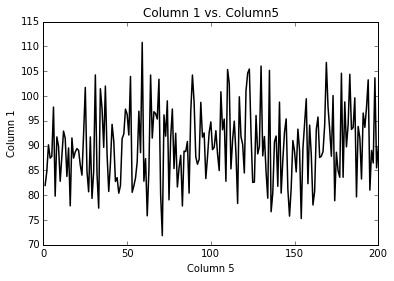

In [49]:
fig = plt.figure()

plt.plot(plot_df.col5, plot_df.col1, 'k-', linewidth = 1.5)
plt.title('Column 1 vs. Column5')
plt.xlabel('Column 5')
plt.ylabel('Column 1')

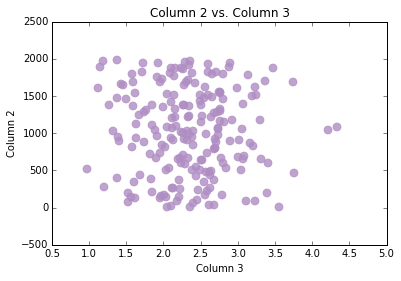

In [50]:
fig = plt.figure()

plt.scatter(plot_df.col2, plot_df.col3, color = '#af8dc3', alpha = 0.8, s = 60)
plt.title('Column 2 vs. Column 3')
plt.xlabel('Column 3')
plt.ylabel('Column 2')

So what did we do? We specified the x and y values we wanted plotted, specified colors and line styles, and some additional things, such as transparencies and labels. Let's take it a step further and specify things like legends on a plot with multiple traces.

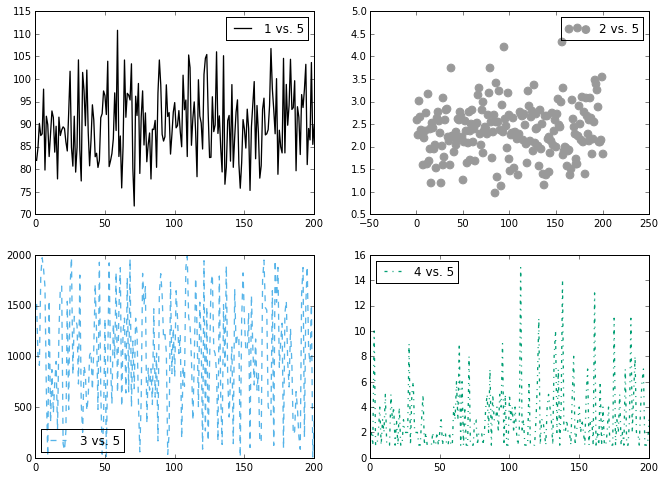

In [51]:
fig = plt.figure(figsize = (11, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(plot_df.col5, plot_df.col1, color = '#000000', linestyle = '-', label = '1 vs. 5', linewidth = 1.3)
ax1.legend(loc = 'best')

ax2.scatter(plot_df.col5, plot_df.col2, color = '#999999', label = '2 vs. 5', s = 60)
ax2.legend(loc = 'best')

ax3.plot(plot_df.col5, plot_df.col3, color = '#56B4E9', linestyle = '--', label = '3 vs. 5', linewidth = 1.3)
ax3.legend(loc = 'best')

ax4.plot(plot_df.col5, plot_df.col4, color = '#009E73', linestyle = '-.', label = '4 vs. 5', linewidth = 1.3)
ax4.legend(loc = 'best')


So in the above, we plotted columns against one another, specified color as a hex string, ad created labels and legends. For multivariate data such as this, you can also make a pairs plot (see the `Seaborn` documentation); due to time this will not be covered but examine the documentation or ask.

We call also call the `DataFrame` directly:

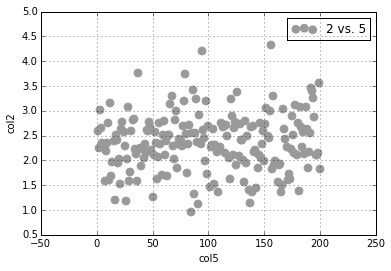

In [52]:
plot_df.plot(kind = 'scatter', x = 'col5', y = 'col2', color = '#999999', label = '2 vs. 5', s = 60)

Next, let's look at various counts and distributions. We will randomly assign labels in a new column; this will also be a good introduction to discretization and grouping.

In [53]:
np.random.seed(484390)

random_nums = np.random.rand(plot_df.shape[0])

#create categorical variables
high = random_nums > 0.85
middling = (random_nums <= 0.85) & (random_nums > 0.5)
just_ugh = random_nums <= 0.5

# assign values to rows and columns
plot_df['Category'] = pd.Series()
plot_df.loc[high, 'Category'] = 'high'
plot_df.loc[middling, 'Category'] = 'middling'
plot_df.loc[just_ugh, 'Category'] = 'terrible'
plot_df.set_index(plot_df.Category, inplace = True, drop = False)
plot_df.head()

,col1,col2,col3,col4,col5,Category
Category,,,,,,
middling,81.961986,2.601655,1516.396194,2,1,middling
terrible,84.773654,2.257777,1000.824544,1,2,terrible
terrible,90.159253,3.020090,911.320312,10,3,terrible
middling,87.472742,2.659358,1798.527503,1,4,middling
middling,87.851031,2.358712,1971.625414,1,5,middling


In [54]:
plot_df.Category.describe()

count          200
unique           3
top       terrible
freq            97
Name: Category, dtype: object

Let's first look at how our data are distributed:

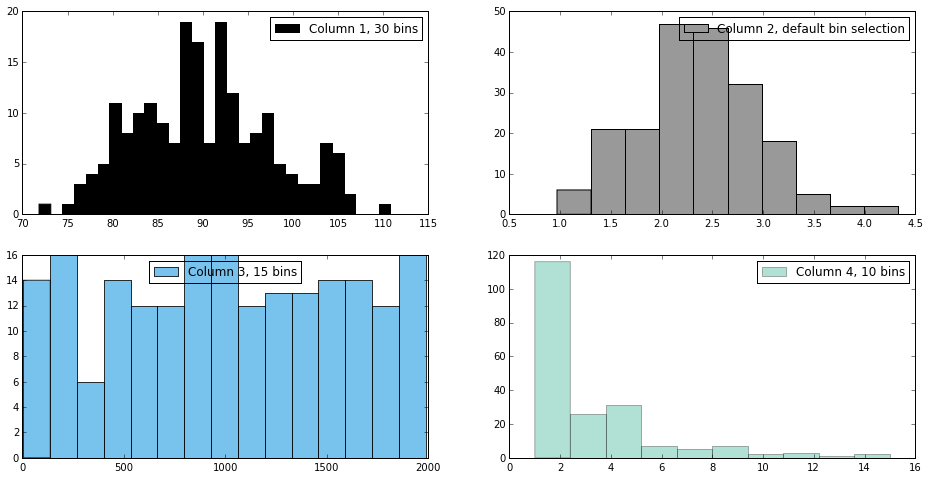

In [61]:
fig = plt.figure(figsize = (16, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.hist(plot_df.col1, color = '#000000', label = 'Column 1, 30 bins', bins = 30)
ax1.legend(loc = 'best')

ax2.hist(plot_df.col2, color = '#999999', label = 'Column 2, default bin selection')
ax2.legend(loc = 'best')

ax3.hist(plot_df.col3, color = '#56B4E9', label = 'Column 3, 15 bins', bins = 15, alpha = 0.8)
ax3.legend(loc = 'best')

ax4.hist(plot_df.col4, color = '#009E73', label = 'Column 4, 10 bins', bins = 10, alpha = 0.3)
ax4.legend(loc = 'best')

Yours truly does not like using histograms since bin selection can give the wrong impression (there are rules of thumb, however). Let's try kernel density estimates instead.

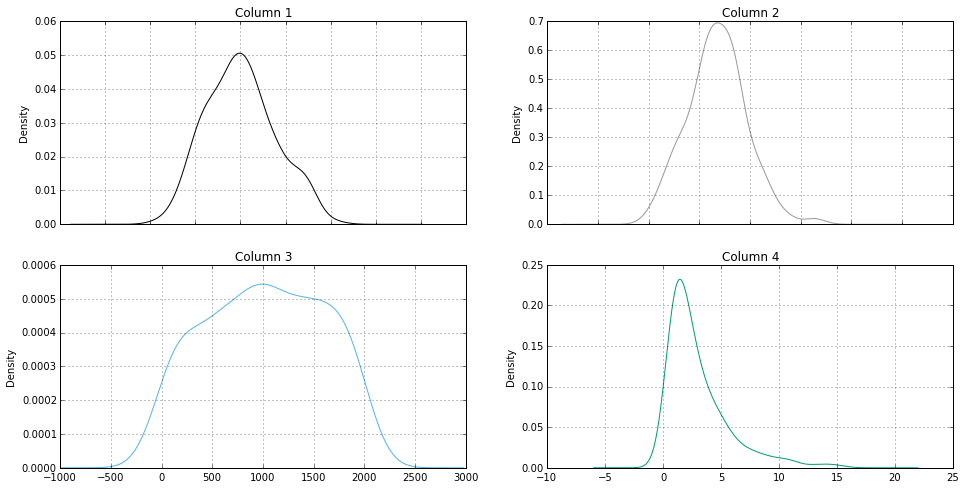

In [62]:
fig = plt.figure(figsize = (16, 8))

plt.subplot2grid((2, 2), (0, 0))
plot_df.col1.plot(kind = 'kde', color = '#000000')
plt.title('Column 1')

plt.subplot2grid((2, 2), (0, 1))
plot_df.col2.plot(kind = 'kde', color = '#999999')
plt.title('Column 2')

plt.subplot2grid((2, 2), (1, 0))
plot_df.col3.plot(kind = 'kde', color = '#56B4E9')
plt.title('Column 3')

plt.subplot2grid((2, 2), (1, 1))
plot_df.col4.plot(kind = 'kde', color = '#009E73')
plt.title('Column 4')

Let's now look at binning the columns:

In [58]:
col3_bins = np.arange(start = 0, stop = 2220, step = 440)
col3_labels = ['one', 'two', 'three', 'four', 'five']
plot_df['col3_cut'] = \
  pd.cut(plot_df.loc[:, 'col3'], right = True, include_lowest = True, \
         bins = col3_bins, labels = np.array(col3_labels))

plot_df.head()

,col1,col2,col3,col4,col5,Category,col3_cut
Category,,,,,,,
middling,81.961986,2.601655,1516.396194,2,1,middling,four
terrible,84.773654,2.257777,1000.824544,1,2,terrible,three
terrible,90.159253,3.020090,911.320312,10,3,terrible,three
middling,87.472742,2.659358,1798.527503,1,4,middling,five
middling,87.851031,2.358712,1971.625414,1,5,middling,five


Now let's group by our new binned column and `Category`; we want to see size in each bucket.

In [59]:
plot_df_grouping = plot_df.groupby(['col3_cut', 'Category']).size().unstack(0)
plot_df_grouping

col3_cut,five,four,one,three,two
Category,,,,,
high,9,7,9,7,8
middling,9,14,10,16,14
terrible,8,23,19,26,21


And now, let's plot this:

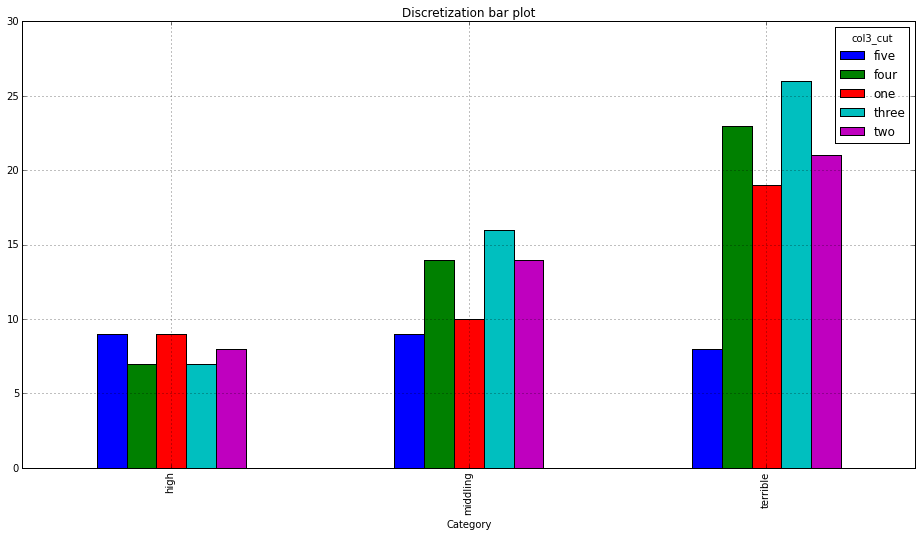

In [63]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 8)
fig = plt.figure()
plot_df_grouping.plot(kind = 'bar', stacked = False, title = 'Discretization bar plot')

## Meta-example: 2012 FEC Presidential Election donation data
The last example will tie in together the concepts just learned, in addition to introducing new ones. This will also be the basis of the first exercise to work on. Some of this cannot be completed until after your look at some of the Hour 2 info, but what has been covered so should get you started.  

The FEC dataset is very large: 5,349,937 rows and 18 columns. Thus, it may tax your system reading it into memory. To lessen the memory load, `pandas` has a method to read in chunks that results in a `DataFrame`. Also, you may want to combine datasets, such as population information from the 2010 US Census (there are several files). For that, we will introduce merge operations. Lastly, you will have to deal with dates and times.  

The ultimate goal of this exercise is to get you to produce figures and analyses similar to those in the assignments. You should also play around with 'prettifying' the figures, something will be covered more in Hour 2 and on Day 3. If you do not want to work on the FEC dataset, please try one of the others and see what analyses and visualizations you can come up with. Basically, we will follow the examples in Wes McKinney's book and expand on it; I found this was really useful in learning `pandas`. We will also revisit this dataset along with the Census data on Day 3.  

Suggested steps towards maximizing information (some will be redundant):
- import FEC data  
- import 2010 US Census data  
- map values such as candidate parties, geographic regions, state names, electoral college votes  
- index data by state  
- create `dict`s to map demographic information  
- convert dates  
- reduce to final two candidates  
- separate donations and expenditures
- summarize amounts  
- write to a delimited file of your choice

###Reading in chunks
In order to import in chunks, you must do the following:
- create an iterator when opening file  
- create an empty `DataFrame`  
- iterate over the chunks

In [64]:
# doing this locally since I already have the dataset
# pandas can also take a zip file and unip it to read it in;
# I have not tried this with chunking or extremely large files

fec_data_head = pd.read_csv('/Users/julian/Documents/R_info/P00000001-ALL.csv', index_col = False, nrows = 10)
fec_data_cols = fec_data_head.columns.values.tolist()

# selected a chunk size of 100000; you can make bigger or smaller depending on amount of free memory
# smaller chunks may take longer, but will also not cause any errors/crashes/melt everything inside
fec_chunker = pd.read_csv('/Users/julian/Documents/R_info/P00000001-ALL.csv', index_col = False, 
                          low_memory = False, chunksize = 100000)

fec_data = pd.DataFrame()

for piece in fec_chunker:
    fec_data = fec_data.append(piece)
fec_data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00410118,P20002978,"Bachmann, Michele","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166,A1FDABC23D2D545A1B83,P2012
1,C00410118,P20002978,"Bachmann, Michele","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166,A899B9B0E223743EFA63,P2012
2,C00410118,P20002978,"Bachmann, Michele","SMITH, LANIER",LANETT,AL,3.686334e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073,A4B144E3CB3294ABC9D6,P2012
3,C00410118,P20002978,"Bachmann, Michele","BLEVINS, DARONDA",PIGGOTT,AR,7.245483e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073,A8C7C6F55B0914C5A880,P2012
4,C00410118,P20002978,"Bachmann, Michele","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.190165e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166,A070D6D560BD84AA98AC,P2012


###Merging with other datasets
Use the `pd.merge` function to merge on indices or columns. Database style merges are very useful and these are the types you will encounter (`pd.merge(left, right, how)`):  
left: match rows from right to left (i.e., keys in left)  
right: match rows from left to right (i.e., keys in right)  
inner: keep rows in both  
outer: keep all values for all rows, i.e., intersection of keys

In [65]:
df1 = pd.DataFrame({'x1': ['alpha', 'beta', 'gamma', 'delta'], 'x2': [1, 2, 3, 4]})
df2 = pd.DataFrame({'x3': [False, False, True, False], 'x1': ['alpha', 'beta', 'omicron', 'gamma']})

In [66]:
df1

,x1,x2
0,alpha,1
1,beta,2
2,gamma,3
3,delta,4


In [67]:
df2

,x1,x3
0,alpha,False
1,beta,False
2,omicron,True
3,gamma,False


In [68]:
pd.merge(df1, df2, how = 'left')

,x1,x2,x3
0,alpha,1,False
1,beta,2,False
2,gamma,3,False
3,delta,4,NaN


In [69]:
pd.merge(df1, df2, how = 'right')

,x1,x2,x3
0,alpha,1,False
1,beta,2,False
2,gamma,3,False
3,omicron,NaN,True


In [70]:
pd.merge(df1, df2, how = 'inner')

,x1,x2,x3
0,alpha,1,False
1,beta,2,False
2,gamma,3,False


In [71]:
pd.merge(df1, df2, how = 'outer')

,x1,x2,x3
0,alpha,1,False
1,beta,2,False
2,gamma,3,False
3,delta,4,NaN
4,omicron,NaN,True


In [72]:
pd.merge(df1, df2, on = 'x1')

,x1,x2,x3
0,alpha,1,False
1,beta,2,False
2,gamma,3,False


### Converting dates and times
Use the `pd.datetime` method on the desired column; remember to specify the data format. You may also want to cut off the hours, minutes and seconds from the time; this may be an issue depending on what function(s) you use to import the data into another program.

In [73]:
date1 = '01-Jun-11'
print(date1)
print 'Time converted to ISO format: ', pd.to_datetime(date1, format = '%d-%b-%y')

01-Jun-11
Time converted to ISO format:  2011-06-01 00:00:00


###Exporting to text
Use the `DataFrame.to_format` method to output a file:, e.g.,  
`fec_data_summarized.to_csv(path/to/file/destination.csv)`  where `path/to/file/destination.csv` is a string.

You will also likely want to make an R-style `data.frame` if you want to do something like time series analysis. To that, use a command such as:  

`fec_net_money_state = fec_final.groupby(state_data_columns, as_index = False)[['contb_receipt_amt']].sum()`  
and then export as normal.

#Assignment

For practice, try to import the FEC dataset, and map values for each state from different data sources. There are plots in the datasets folder than give an idea of some things that you can do.  

Possible pipeline:  
- import 2012 FEC Presidential data  
- append/map the popular vote totals  
- append/map the following census data:  
    - state population data  
    - elderly population data  
    - family/househould structure data  
- append/map parties of the major two candidates  
- append/map geographic regions (as seen above)  
- append/map full state names  
- append/map Electoral College votes for each state  

For a final summary, try the following:  
- restrict to 50 state + DC (hint: create a `dict` where the state abbreviations are the keys and use the `isin` function to restrict the data)  
- restrict the data to the final two candidates  
- have three separate datasets: all data, donations, expenditures  


If you do the above, the data restricted to just the 50 states + DC for the Romney and Obama campaigns when written to a CSV file should be about **2 GB**.

##References

McKinney, Wes. *Python for Data Analysis*. Should be able to access through Penn Libraries.  
Markham, Justin. [Introduction to Linear Regression](http://nbviewer.ipython.org/github/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb). Used as an aexample to create categorical values for a variable.

In [74]:
import IPython
import sys

In [75]:
print 'Python version: ', sys.version
print 'Platform: ', sys.platform
print 'IPython version: ', IPython.__version__
print 'NumPy version: ', np.__version__
print 'Pandas version: ', pd.__version__

Python version:  2.7.9 |Anaconda 2.2.0 (x86_64)| (default, Dec 15 2014, 10:37:34) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Platform:  darwin
IPython version:  3.1.0
NumPy version:  1.9.2
Pandas version:  0.15.2
